
<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Communication Systems <br>
<font color=2565AE size=5>
    Electrical Engineering Department <br>
    Spring 2025<br>
<font color=3C99D size=5>
    Huffman Coding  <br>



# Personal Data

In [ ]:
#Set your student number and name 
Member_1="Nima Zohari ShilSar"
Student_number_1="401101773"
Member_2="Amin MohammadPour Aghdam"
Student_number_2="401102445"

# Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as pyplot
import sys
sys.setrecursionlimit(15000)
print(sys.getrecursionlimit())
import heapq
from typing import List, Dict, Tuple

15000


# Huffman Coding

In the following, the Huffman algorithm to find the optimal one-shot source code is going to be implemented. Assume that we have a memoryless source, modeled by a sequence of i.i.d. random variables, sampled from a known distribution $P_X$. From information-theoretical results, you know that for the average codeword length $\bar{L}_{\mathrm{opt}}$ of an optimal code, we have
$$ H(X)\le \bar{L}_{\mathrm{opt}} < H(X)+1.$$

In the following, You are going to show that by increasing the block length, one can construct a source code with average length per symbol, which is arbitrarily close to $H(X)$.

Implement the entropy function below.

In [29]:
def H(p: np.ndarray) -> float:
    # Ensure p is a numpy array
    p = np.asarray(p, dtype=float)
    
    # Filter out zero probabilities to avoid log2(0)
    p_nonzero = p[p > 0]
    
    # Compute entropy
    entropy = -np.sum(p_nonzero * np.log2(p_nonzero))
    return entropy

Now, complete function Huffman as described

In [30]:
def Huffman(p: np.ndarray) -> Dict[int, str]:
    # Ensure p is numpy array
    p = np.asarray(p, dtype=float)
    assert p.ndim == 1, "Input distribution p must be a 1D array"
    n = len(p)
    
    # Priority queue of (weight, unique_id, node)
    # Node: either leaf (symbol index) or internal (left, right)
    class Node:
        def __init__(self, symbol=None, left=None, right=None):
            self.symbol = symbol
            self.left = left
            self.right = right
    
    heap: List[Tuple[float, int, Node]] = []
    # Unique sequence count to break ties
    uid = 0
    for i, prob in enumerate(p):
        if prob > 0:
            heap.append((prob, uid, Node(symbol=i)))
            uid += 1
    heapq.heapify(heap)
    
    # Handle edge case: only one symbol or all zero
    if len(heap) == 0:
        return {}
    if len(heap) == 1:
        # Only one symbol, assign code '0'
        _, _, single_node = heap[0]
        return {single_node.symbol: '0'}
    
    # Build Huffman tree
    while len(heap) > 1:
        w1, id1, node1 = heapq.heappop(heap)
        w2, id2, node2 = heapq.heappop(heap)
        merged = Node(left=node1, right=node2)
        heapq.heappush(heap, (w1 + w2, uid, merged))
        uid += 1
    
    # The remaining node is the root
    _, _, root = heap[0]
    
    # Traverse tree to get codes
    codes: Dict[int, str] = {}
    def traverse(node: Node, prefix: str):
        if node.symbol is not None:
            # Leaf node
            codes[node.symbol] = prefix or '0'  # Assign '0' if prefix is empty
        else:
            # Internal node: left=0, right=1
            traverse(node.left, prefix + '0')
            traverse(node.right, prefix + '1')
    
    traverse(root, "")
    return codes

Complete this function so it outputs the average length of code as described in theoretical section

In [31]:
def Huffman_avg_length(p: np.ndarray) -> float:
    # Generate Huffman code dictionary
    code = Huffman(p)
    
    # Compute average length
    avg_len = float(np.sum([p[i] * len(code[i]) for i in range(len(p)) if i in code]))
    return avg_len

In [32]:
# Test Huffman() and Huffman_avg_length() functions.
p = np.array([0.5,0.25,0.125,0.125])
print(p.sum())
print(Huffman(p))
print(p)
print(Huffman_avg_length(p))
print(H(p))

1.0
{0: '0', 1: '10', 2: '110', 3: '111'}
[0.5   0.25  0.125 0.125]
1.75
1.75


In [33]:
def dist_cartesian_prod(p: np.ndarray, bl: int) -> np.ndarray:
    # Validate inputs
    p = np.asarray(p, dtype=float)
    assert p.ndim == 1, "p must be a 1D array"
    assert np.all(p >= 0), "Probabilities must be non-negative"
    assert np.isclose(p.sum(), 1), "Probabilities must sum to 1"
    assert isinstance(bl, int) and bl >= 1, "bl must be a positive integer"
    
    # Start with the original distribution
    p_cart = p.copy()
    # Repeatedly take outer product to build up the block distribution
    for _ in range(bl - 1):
        p_cart = np.multiply.outer(p_cart, p).reshape(-1)
    
    return p_cart

# Test
After implementing functions above, run cells below and answer the following questions.
The output of first test is given as an example.

Entropy of source is: 2.1464393446710153
[1, 2, 3, 4, 5]
[2.2, 2.165, 2.1588333333333334, 2.1531843750000004, 2.153467]


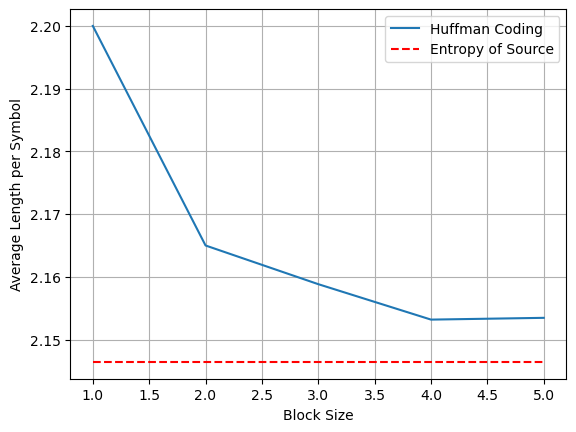

In [34]:
p = np.array([0.4,0.2,0.15,0.1,0.15])

print('Entropy of source is:',H(p))

max_blk_length = 5

blk_size = []
avg_len = []
for bl in range(1,max_blk_length+1):
    blk_size.append(bl)
    avg_len.append(Huffman_avg_length(dist_cartesian_prod(p,bl))/bl)
        
print(blk_size)
print(avg_len)

pyplot.plot(blk_size,avg_len, label='Huffman Coding')
pyplot.plot([1,5],[H(p),H(p)], 'r--', label='Entropy of Source')
pyplot.xlabel('Block Size')
pyplot.ylabel('Average Length per Symbol')
pyplot.legend()
pyplot.grid(True)
pyplot.show()


Entropy of source is: 1.4854752972273344
[1, 2, 3, 4, 5, 6, 7, 8]
[1.5, 1.4999999999999998, 1.4956666666666665, 1.4930750000000002, 1.491488, 1.4904721666666667, 1.4897157142857143, 1.4891539249999999]


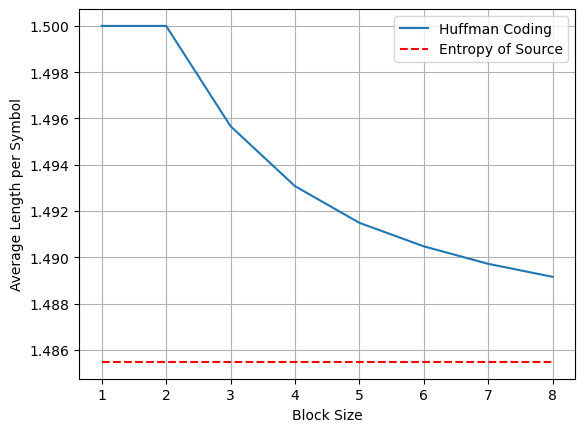

In [36]:
p = np.array([0.5,0.2,0.3])

print('Entropy of source is:',H(p))

max_blk_length = 8

blk_size = []
avg_len = []
for bl in range(1,max_blk_length+1):
    blk_size.append(bl)
    avg_len.append(Huffman_avg_length(dist_cartesian_prod(p,bl))/bl)
        
print(blk_size)
print(avg_len)

pyplot.plot(blk_size,avg_len, label='Huffman Coding')
pyplot.plot([1,8],[H(p),H(p)], 'r--', label='Entropy of Source')
pyplot.xlabel('Block Size')
pyplot.ylabel('Average Length per Symbol')
pyplot.legend()
pyplot.grid(True)
pyplot.show()


Entropy of source is: 0.9927744539878083
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[1.0, 1.0, 1.0000000000000002, 0.9999046875000004, 0.9981355625000002, 0.9976630677083337, 0.9968490897321433, 0.9965364488134769, 0.9959800472677957, 0.9958041081991412, 0.9953765153812878, 0.9952924069794582, 0.9949358645994375]


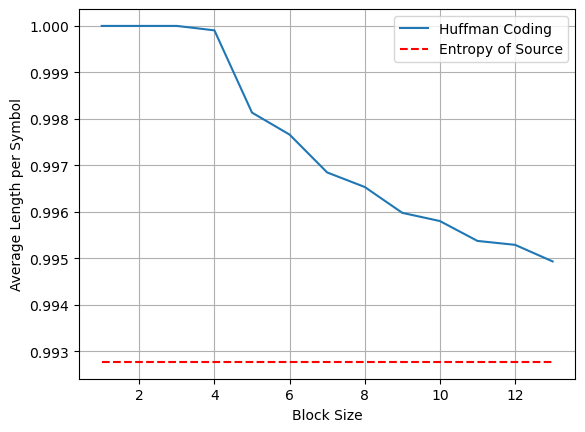

In [ ]:
p = np.array([0.55,0.45])

print('Entropy of source is:',H(p))

max_blk_length = 13

blk_size = []
avg_len = []
for bl in range(1,max_blk_length+1):
    blk_size.append(bl)
    avg_len.append(Huffman_avg_length(dist_cartesian_prod(p,bl))/bl)
        
print(blk_size)
print(avg_len)

pyplot.plot(blk_size,avg_len, label='Huffman Coding')
pyplot.plot([1,13],[H(p),H(p)], 'r--', label='Entropy of Source')
pyplot.xlabel('Block Size')
pyplot.ylabel('Average Length per Symbol')
pyplot.legend()
pyplot.grid(True)
pyplot.show()


Entropy of source is: 0.7219280948873623
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[1.0, 0.7800000000000001, 0.7280000000000002, 0.7408000000000002, 0.7379200000000002, 0.7252480000000002, 0.7317558857142862, 0.7322281600000005, 0.7251398542222226, 0.7282013184000005, 0.7296009532509096, 0.7250406980266672, 0.7262139535675082]


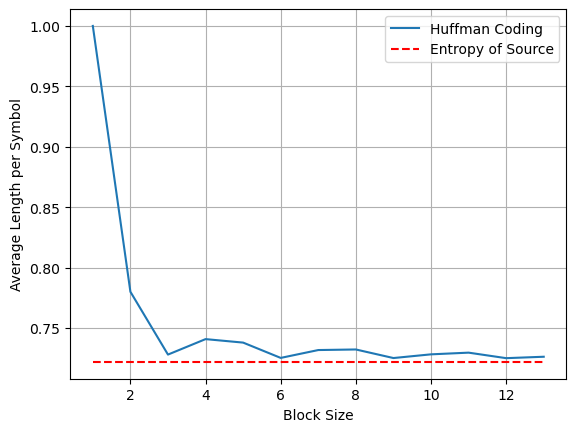

In [16]:
p = np.array([0.8,0.2])

print('Entropy of source is:',H(p))

max_blk_length = 13

blk_size = []
avg_len = []
for bl in range(1,max_blk_length+1):
    blk_size.append(bl)
    avg_len.append(Huffman_avg_length(dist_cartesian_prod(p,bl))/bl)
        
print(blk_size)
print(avg_len)

pyplot.plot(blk_size,avg_len, label='Huffman Coding')
pyplot.plot([1,13],[H(p),H(p)], 'r--', label='Entropy of Source')
pyplot.xlabel('Block Size')
pyplot.ylabel('Average Length per Symbol')
pyplot.legend()
pyplot.grid(True)
pyplot.show()

Entropy of source is: 0.4689955935892812
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[1.0, 0.645, 0.5326666666666667, 0.49255000000000015, 0.4801940000000001, 0.4701568333333334, 0.47434155714285736, 0.47579935125000017, 0.4749980821111113, 0.47669119419000017, 0.47327935997272746, 0.46997667376058355, 0.4713699318890233]


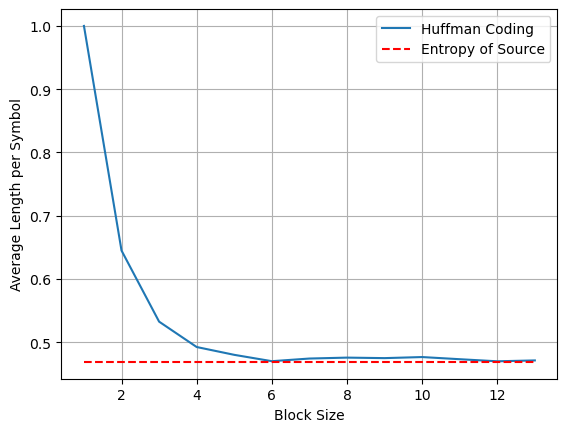

In [17]:
p = np.array([0.1,0.9])

print('Entropy of source is:',H(p))

max_blk_length = 13

blk_size = []
avg_len = []
for bl in range(1,max_blk_length+1):
    blk_size.append(bl)
    avg_len.append(Huffman_avg_length(dist_cartesian_prod(p,bl))/bl)
        
print(blk_size)
print(avg_len)

pyplot.plot(blk_size,avg_len, label='Huffman Coding')
pyplot.plot([1,13],[H(p),H(p)], 'r--', label='Entropy of Source')
pyplot.xlabel('Block Size')
pyplot.ylabel('Average Length per Symbol')
pyplot.legend()
pyplot.grid(True)
pyplot.show()


# Shannon-Fano Coding (Bonus)

Do the exact same procedure for Shannon-Fano Code.

In [38]:
def shannon_fano(p: np.ndarray) -> Dict[int, str]:
    # Ensure we work with floats and valid distribution
    p = np.asarray(p, dtype=float)
    assert p.ndim == 1 and np.all(p >= 0) and np.isclose(p.sum(), 1), \
        "p must be 1D non-negative array summing to 1"
    
    # Create initial list of (symbol, probability)
    symbols = list(range(len(p)))
    probs = p.tolist()
    # Sort symbols descending by probability
    paired: List[Tuple[int, float]] = sorted(zip(symbols, probs),
                                            key=lambda x: x[1],
                                            reverse=True)
    codes: Dict[int, str] = {sym: "" for sym, _ in paired}

    def recursive_assign(items: List[Tuple[int, float]]):
        if len(items) <= 1:
            return
        # Compute total probability
        total = sum(prob for _, prob in items)
        # Find split point minimizing difference between group sums
        acc = 0.0
        best_idx = 0
        min_diff = total
        for i, (_, prob) in enumerate(items):
            acc += prob
            diff = abs((total - acc) - acc)
            if diff < min_diff:
                min_diff = diff
                best_idx = i
        # Partition
        group0 = items[:best_idx + 1]
        group1 = items[best_idx + 1:]
        # Assign '0' prefix to group0 symbols, '1' prefix to group1
        for sym, _ in group0:
            codes[sym] += "0"
        for sym, _ in group1:
            codes[sym] += "1"
        # Recurse on each group
        recursive_assign(group0)
        recursive_assign(group1)

    # Kick off recursion
    recursive_assign(paired)
    return codes

def shannon_fano_avg_length(p: np.ndarray) -> float:
    codes = shannon_fano(p)
    return float(sum(p[i] * len(codes[i]) for i in codes))

# Test

Entropy of source is: 2.1464393446710153
Block sizes: [1, 2, 3, 4, 5]
SF average lengths per symbol: [2.2, 2.17, 2.1618333333333317, 2.162318749999996, 2.1563174374999656]


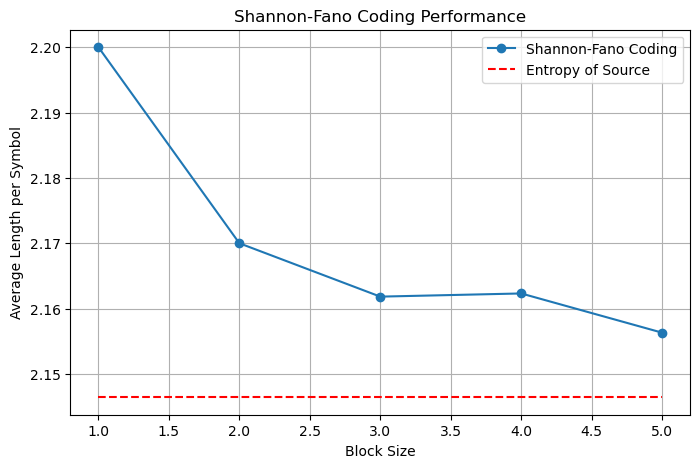

In [39]:
p = np.array([0.4, 0.2, 0.15, 0.1, 0.15])

# Print entropy
print('Entropy of source is:', H(p))

# Maximum block length to test
max_blk_length = 5

blk_size = []
avg_len_sf = []
for bl in range(1, max_blk_length + 1):
    blk_size.append(bl)
    # Compute Shannon-Fano average length per symbol for block length bl
    p_blk = dist_cartesian_prod(p, bl)
    avg_len = shannon_fano_avg_length(p_blk) / bl
    avg_len_sf.append(avg_len)

# Display the results
print("Block sizes:", blk_size)
print("SF average lengths per symbol:", avg_len_sf)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(blk_size, avg_len_sf, marker='o', label='Shannon-Fano Coding')
plt.hlines(H(p), 1, max_blk_length, colors='r', linestyles='--', label='Entropy of Source')
plt.xlabel('Block Size')
plt.ylabel('Average Length per Symbol')
plt.title('Shannon-Fano Coding Performance')
plt.legend()
plt.grid(True)
plt.show()


Entropy of source is: 1.4854752972273344
Block sizes: [1, 2, 3, 4, 5, 6, 7, 8]
SF average lengths per symbol: [1.5, 1.5, 1.4959999999999998, 1.4996999999999994, 1.4965000000000006, 1.4944408333333283, 1.493447371428578, 1.4925976900001126]


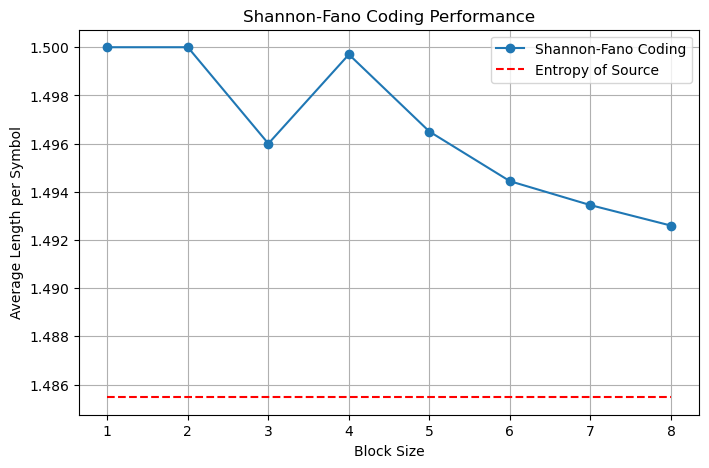

In [40]:
p = np.array([0.5, 0.2, 0.3])

# Print entropy of the source
print('Entropy of source is:', H(p))

# Maximum block length to test
max_blk_length = 8

blk_size = []
avg_len_sf = []
for bl in range(1, max_blk_length + 1):
    blk_size.append(bl)
    # Compute Shannon-Fano average length per symbol for block length bl
    p_blk = dist_cartesian_prod(p, bl)
    avg_len = shannon_fano_avg_length(p_blk) / bl
    avg_len_sf.append(avg_len)

# Display the results
print("Block sizes:", blk_size)
print("SF average lengths per symbol:", avg_len_sf)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(blk_size, avg_len_sf, marker='o', label='Shannon-Fano Coding')
plt.hlines(H(p), 1, max_blk_length, colors='r', linestyles='--', label='Entropy of Source')
plt.xlabel('Block Size')
plt.ylabel('Average Length per Symbol')
plt.title('Shannon-Fano Coding Performance')
plt.legend()
plt.grid(True)
plt.show()



Entropy of source is: 0.9927744539878083
Block sizes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
SF average lengths per symbol: [1.0, 1.0, 1.0120416666666667, 0.9999046875000004, 1.0032093125000006, 1.0009671927083341, 1.0000181172991065, 0.9994348797412091, 0.9990542857599891, 0.9984626828738999, 0.9979276177219727, 0.9976135971297496, 0.9971456111141926]


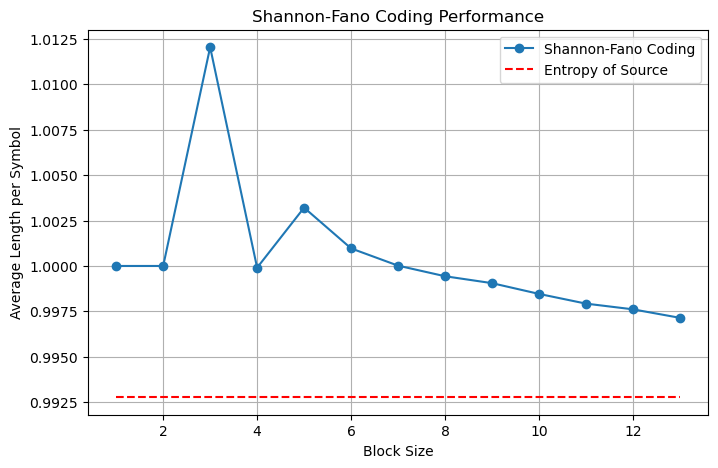

In [24]:
p = np.array([0.55,0.45])

print('Entropy of source is:',H(p))

max_blk_length = 13
blk_size = []
avg_len_sf = []
for bl in range(1, max_blk_length + 1):
    blk_size.append(bl)
    # Compute Shannon-Fano average length per symbol for block length bl
    p_blk = dist_cartesian_prod(p, bl)
    avg_len = shannon_fano_avg_length(p_blk) / bl
    avg_len_sf.append(avg_len)

# Display the results
print("Block sizes:", blk_size)
print("SF average lengths per symbol:", avg_len_sf)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(blk_size, avg_len_sf, marker='o', label='Shannon-Fano Coding')
plt.hlines(H(p), 1, max_blk_length, colors='r', linestyles='--', label='Entropy of Source')
plt.xlabel('Block Size')
plt.ylabel('Average Length per Symbol')
plt.title('Shannon-Fano Coding Performance')
plt.legend()
plt.grid(True)
plt.show()

Entropy of source is: 0.7219280948873623
Block sizes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
SF average lengths per symbol: [1.0, 0.7800000000000002, 0.7280000000000002, 0.7664000000000002, 0.7379200000000004, 0.725248, 0.7392457142857142, 0.7325609599999989, 0.7251544177777797, 0.7309278208000136, 0.7296109623854599, 0.7250406980266736, 0.7275396966872647]


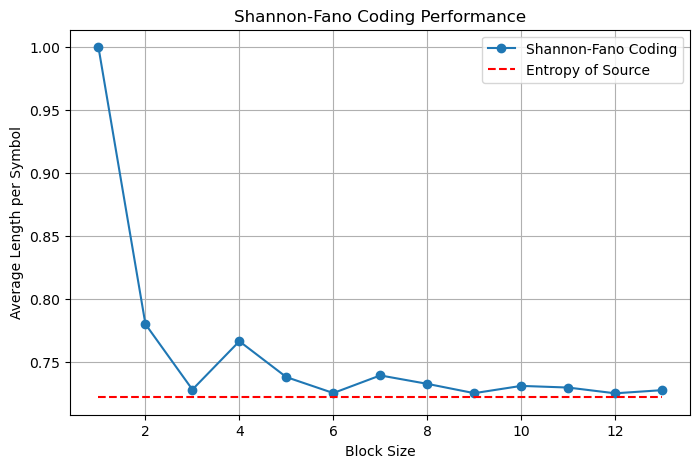

In [25]:
p = np.array([0.8,0.2])

print('Entropy of source is:',H(p))

max_blk_length = 13
blk_size = []
avg_len_sf = []
for bl in range(1, max_blk_length + 1):
    blk_size.append(bl)
    # Compute Shannon-Fano average length per symbol for block length bl
    p_blk = dist_cartesian_prod(p, bl)
    avg_len = shannon_fano_avg_length(p_blk) / bl
    avg_len_sf.append(avg_len)

# Display the results
print("Block sizes:", blk_size)
print("SF average lengths per symbol:", avg_len_sf)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(blk_size, avg_len_sf, marker='o', label='Shannon-Fano Coding')
plt.hlines(H(p), 1, max_blk_length, colors='r', linestyles='--', label='Entropy of Source')
plt.xlabel('Block Size')
plt.ylabel('Average Length per Symbol')
plt.title('Shannon-Fano Coding Performance')
plt.legend()
plt.grid(True)
plt.show()

Entropy of source is: 0.4689955935892812
Block sizes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
SF average lengths per symbol: [1.0, 0.6450000000000001, 0.5326666666666667, 0.49255000000000004, 0.4810039999999999, 0.47066983333333295, 0.47547671428571386, 0.5063772462499988, 0.48564024900000735, 0.4772457380099957, 0.47468786047183686, 0.472029473388073, 0.47309459997288095]


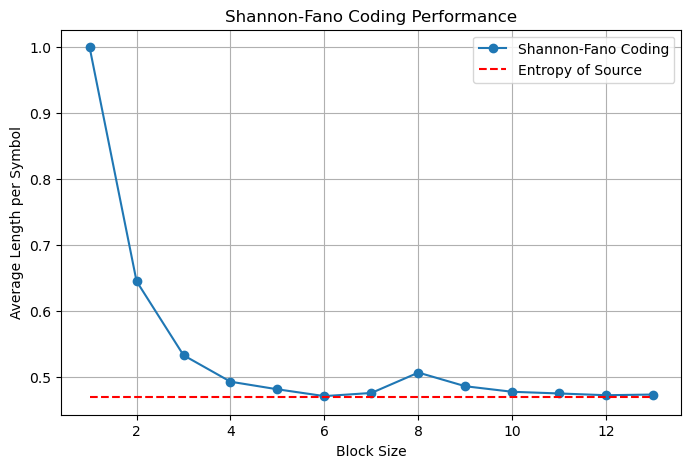

In [28]:
p = np.array([0.1,0.9])

print('Entropy of source is:',H(p))

max_blk_length = 13
blk_size = []
avg_len_sf = []
for bl in range(1, max_blk_length + 1):
    blk_size.append(bl)
    # Compute Shannon-Fano average length per symbol for block length bl
    p_blk = dist_cartesian_prod(p, bl)
    avg_len = shannon_fano_avg_length(p_blk) / bl
    avg_len_sf.append(avg_len)

# Display the results
print("Block sizes:", blk_size)
print("SF average lengths per symbol:", avg_len_sf)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(blk_size, avg_len_sf, marker='o', label='Shannon-Fano Coding')
plt.hlines(H(p), 1, max_blk_length, colors='r', linestyles='--', label='Entropy of Source')
plt.xlabel('Block Size')
plt.ylabel('Average Length per Symbol')
plt.title('Shannon-Fano Coding Performance')
plt.legend()
plt.grid(True)
plt.show()

# Questions

1-Does extending the blocklength always makes us closer to entropy? why? <br>
2-Does Huffman method work better than Shannon-Fano for the same blocklength?<br>
3-Can we reach entropy with Shannon-Fano Coding?<br>

We've put our answers to these 3 questions in our WORD report :)